## Questionario 1 - Redes Complexas

Aluno: Ricardo Tetti Camacho - 10728098

Professor: Francisco Aparecido Rodrigues

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import math

In [2]:
def degree_distribution(G):
    vk = dict(G.degree())
    vk = list(vk.values()) 
    vk = np.array(vk)
    maxk = np.max(vk)
    mink = np.min(vk)
    kvalues= np.arange(0,maxk+1) 
    Pk = np.zeros(maxk+1) 
    for k in vk:
        Pk[k] = Pk[k] + 1
    Pk = Pk/sum(Pk) 
    return kvalues,Pk

In [3]:
def momment_of_degree_distribution(G,m):
    k,Pk = degree_distribution(G)
    M = sum((k**m)*Pk)
    return M

In [4]:
def momment_of_degree_distribution2(G,m):
    M = 0
    N = len(G)
    for i in G.nodes:
        M = M + G.degree(i)**m
    M = M/N
    return M

### Questão 1 

In [5]:
G= nx.read_edgelist("lesmis.txt", nodetype=int, data=(('weight',float),))

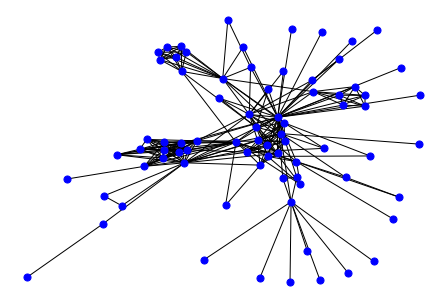

In [6]:
pos = nx.spring_layout(G)
nx.draw(G, pos, node_color="b", node_size=50, with_labels=False)

In [8]:
k3 = momment_of_degree_distribution2(G,3)
k4 = momment_of_degree_distribution2(G,4)
print("Terceiro e quarto momento da distribuição de grau = ", k3,',', k4)

Terceiro e quarto momento da distribuição de grau =  1408.025974025974 , 33592.72727272727


### Questão 2

In [9]:
power_grid = nx.read_edgelist("powergrid.txt", nodetype=int)

In [10]:
k1 = momment_of_degree_distribution2(power_grid,1)
k2 = momment_of_degree_distribution2(power_grid,2)
coeficiente_de_complexidade = k2/k1
print("Coeficiente de complexidade Power Grid = ", coeficiente_de_complexidade)

Coeficiente de complexidade Power Grid =  3.8712465878070974


### Questão 3

In [11]:
euro_road = nx.read_edgelist("euroroad.txt", nodetype = int)

In [12]:
def shannon_entropy(G):
    k,Pk = degree_distribution(G)
    H = 0
    for p in Pk:
        if(p > 0):
            H = H - p*math.log(p, 2)
    return H

In [13]:
euroroad_entropy = shannon_entropy(euro_road)
print(euroroad_entropy)

2.0033103874527756


### Questão 4

In [14]:
aeroportos = nx.read_edgelist("usairport.txt",nodetype=int, data=(('weight',float),))

In [17]:
aeroportos_transitivity = nx.transitivity(aeroportos)
print("Transitividade = ",aeroportos_transitivity)

Transitividade =  0.38414344664491556


In [18]:
aeroportos_cluster = nx.average_clustering(aeroportos)
print("Cluster médio = ", aeroportos_cluster)

Cluster médio =  0.5041525392095769


### Questão 5

In [20]:
k1_aeroportos = momment_of_degree_distribution2(aeroportos,1)
k2_aeroportos = momment_of_degree_distribution2(aeroportos,2)
complexidade = k2_aeroportos/k1_aeroportos
print("Complexidade aeroportos = ", complexidade)

Complexidade aeroportos =  112.22224803950043


In [21]:
aeroporto_entropia = shannon_entropy(aeroportos)
print("Entropia rede de aeroportos = ", aeroporto_entropia)

Entropia rede de aeroportos =  4.985977646539227
